# Physics 256
## Lecture 11 - Plot Types

<img src="http://matplotlib.org/_static/logo2.png" width=400px>

## Last Time

- using LaTeX in plot labels
- meshgrid for multi-dimensional data sets
- plot customization

## Today

- plot types


## Plotting with Matplotlib

In [1]:
import matplotlib.pyplot as plt
import numpy as np
#%matplotlib inline
plt.style.use('notebook');
#%config InlineBackend.figure_format = 'retina'
colors = ["#2078B5", "#FF7F0F", "#2CA12C", "#D72827", "#9467BE", "#8C574B",
            "#E478C2", "#808080", "#BCBE20", "#17BED0", "#AEC8E9", "#FFBC79", 
            "#98E08B", "#FF9896", "#C6B1D6", "#C59D94", "#F8B7D3", "#C8C8C8", 
           "#DCDC8E", "#9EDAE6"]

## Plot Types

Matplotlib includes almost any imaginable type of chart or graph.  A good starting point to determine what is the best type of graph for your particular data is:

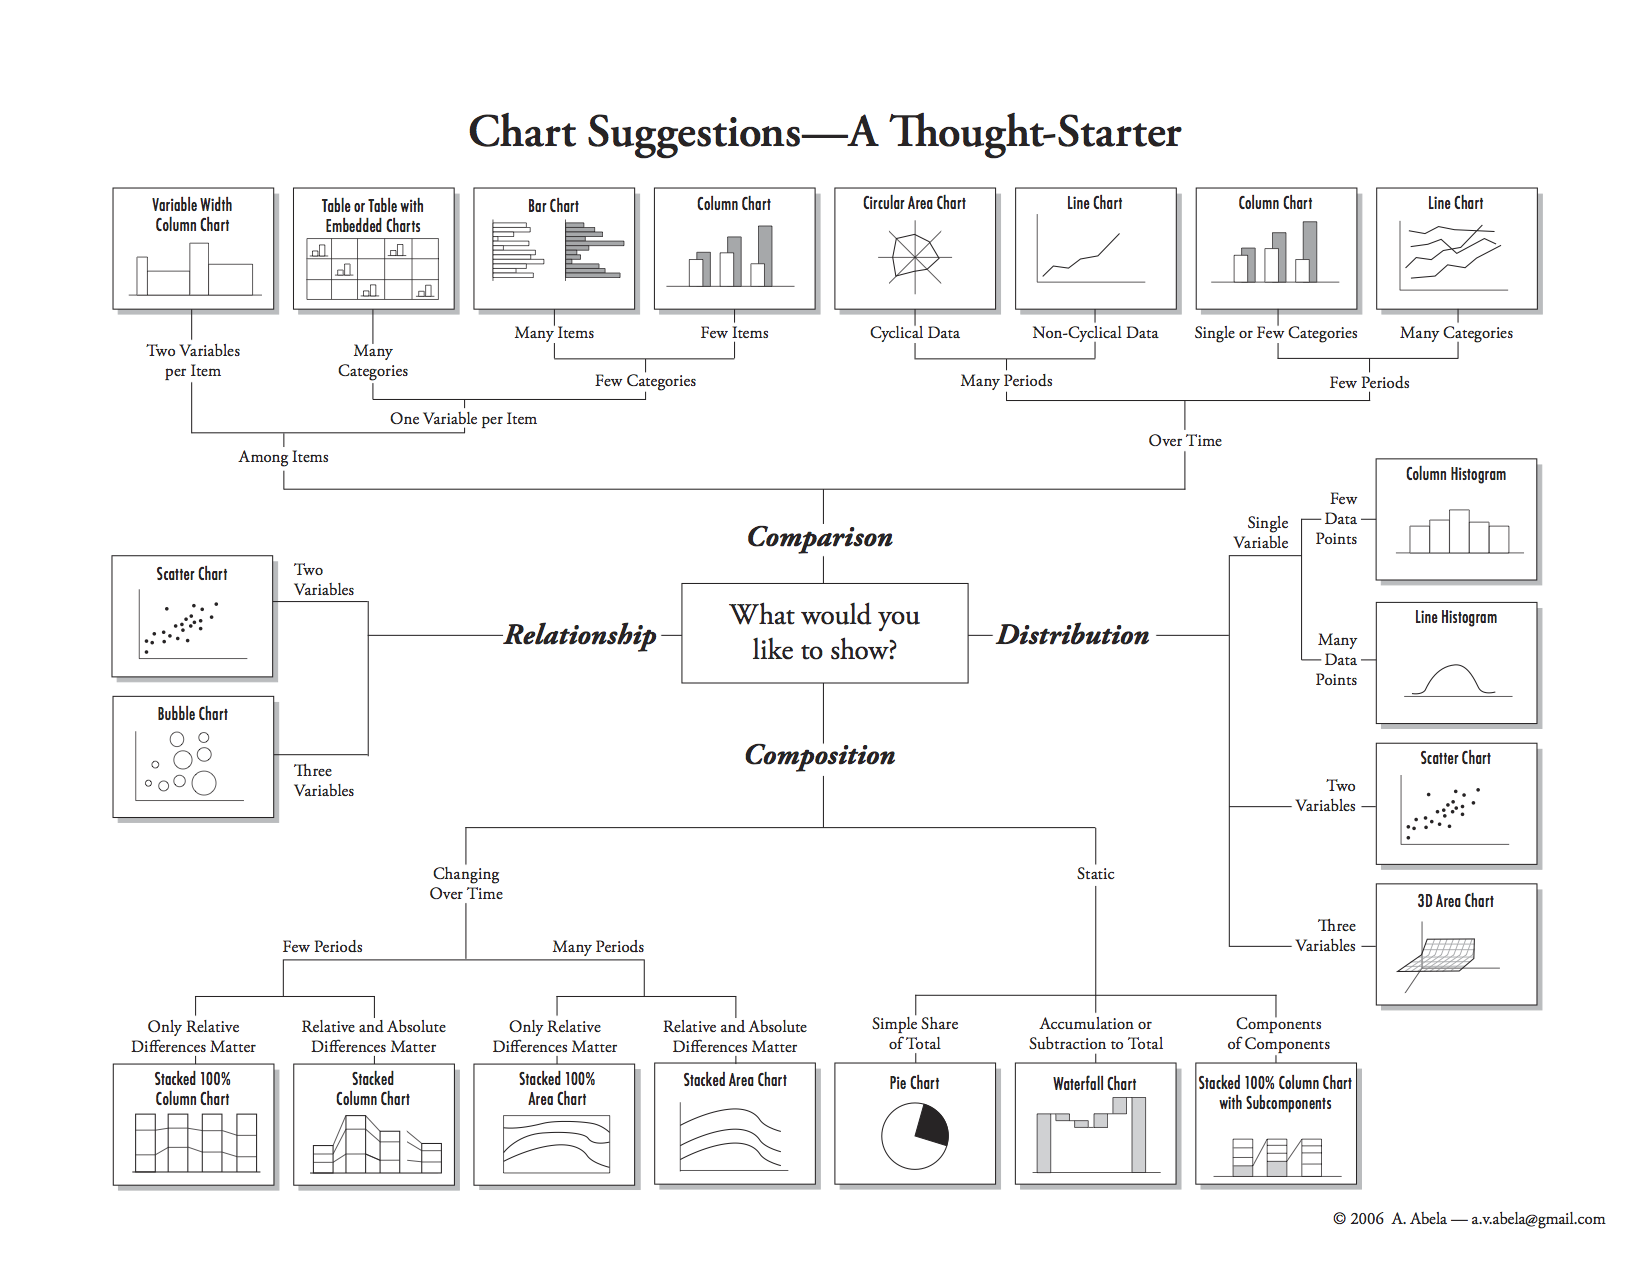

In [40]:
from IPython.display import Image
Image(filename='data/choosing_a_good_chart.png')

### Histograms

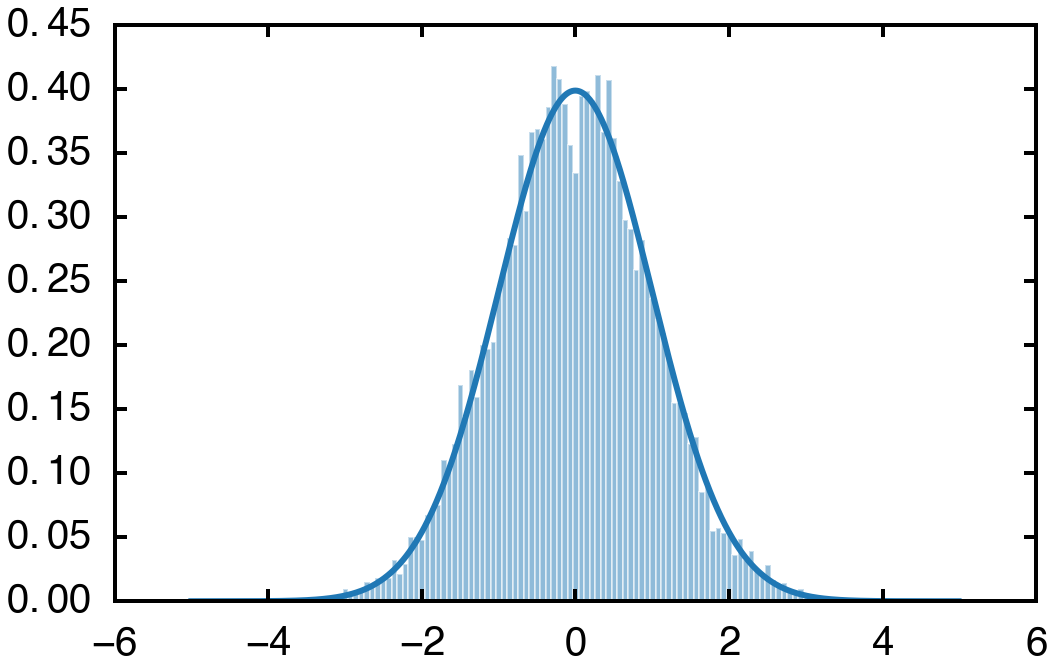

In [5]:
plt.figure(1)
# get 10000 gaussian distributed random numbers
h = np.random.randn(10000)

# the number of bins for our histogram
numBins = 100
plt.hist(h,numBins,edgecolor='w', normed=True, alpha=0.5)

# let's add the theoretical value
x = np.arange(-5,5,0.01)
y = np.exp(-x**2/2)/np.sqrt(2.0*np.pi)
plt.plot(x,y,'-', color=colors[0])

# we can save our figure to disk
plt.savefig('output/histogram.pdf')

### Errorbars

<Container object of 3 artists>

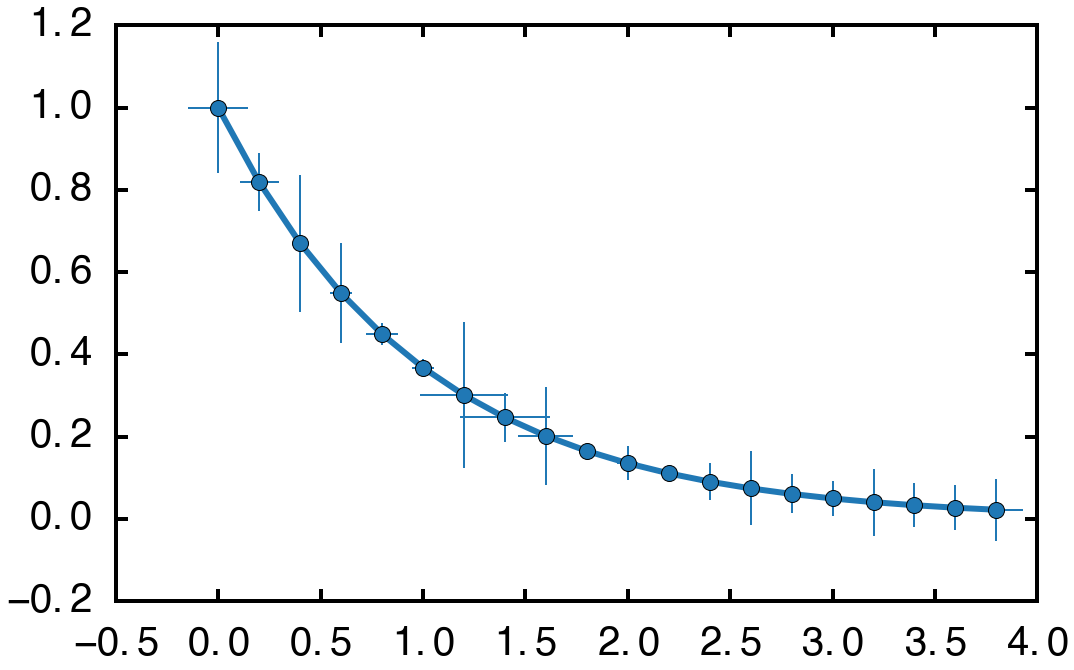

In [8]:
# errorbars
plt.figure(2)
x = np.arange(0, 4, 0.2) 
y = np.exp(-x) 
dy = 0.1 * np.abs(np.random.randn(len(y))) 
dx = 0.1 * np.abs(np.random.randn(len(y))) 
plt.errorbar(x,y,xerr=dx,yerr=dy,marker='o',markersize=8.0,capsize=0.0,elinewidth=1.0)

### Bar charts

([<matplotlib.axis.YTick at 0x110955160>,
 <a list of 4 Text yticklabel objects>)

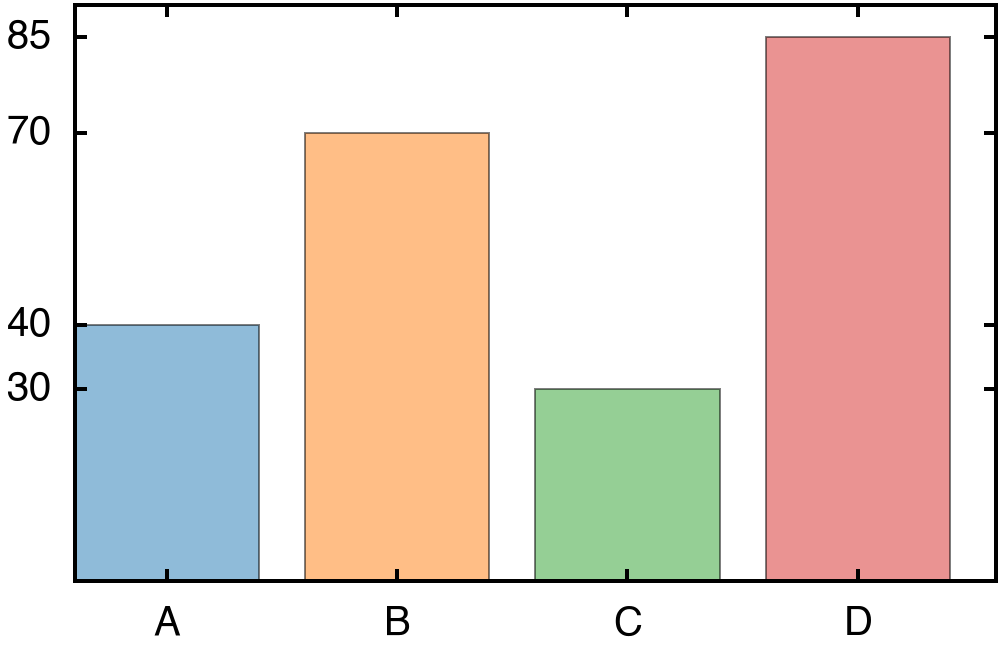

In [26]:
plt.figure(3)
bar = {'A': 40, 'B': 70, 'C': 30, 'D': 85} 
bar = sorted(bar.items())

keys = []
vals = []
for i,cbar in enumerate(bar): 
    plt.bar(i, cbar[1], alpha=0.5,color=colors[i])
    keys.append(cbar[0])
    vals.append(cbar[1])

plt.xticks(np.arange(len(bar))+0.4,keys)
plt.yticks(vals)

### Pie charts

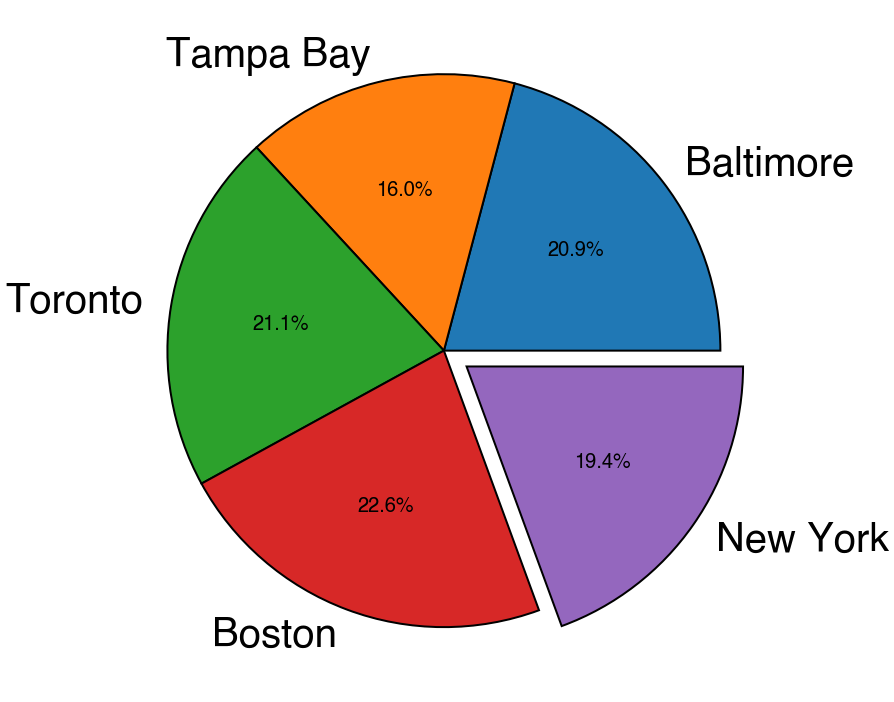

In [27]:
# pie chart
plt.figure(4,figsize=(6,6));
aleast = {'Boston':92, 'New York':79, 'Tampa Bay':65, 'Toronto':86, 'Baltimore':85}
explode = [0.0, 0.0, 0.0, 0.0, 0.1] 
plt.pie(list(aleast.values()), labels=list(aleast.keys()), explode=explode, autopct='%3.1f%%', colors=colors[:]); 

### Scatter plots

Useful and effecient for large amounts of data points

/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/collections.py:806: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


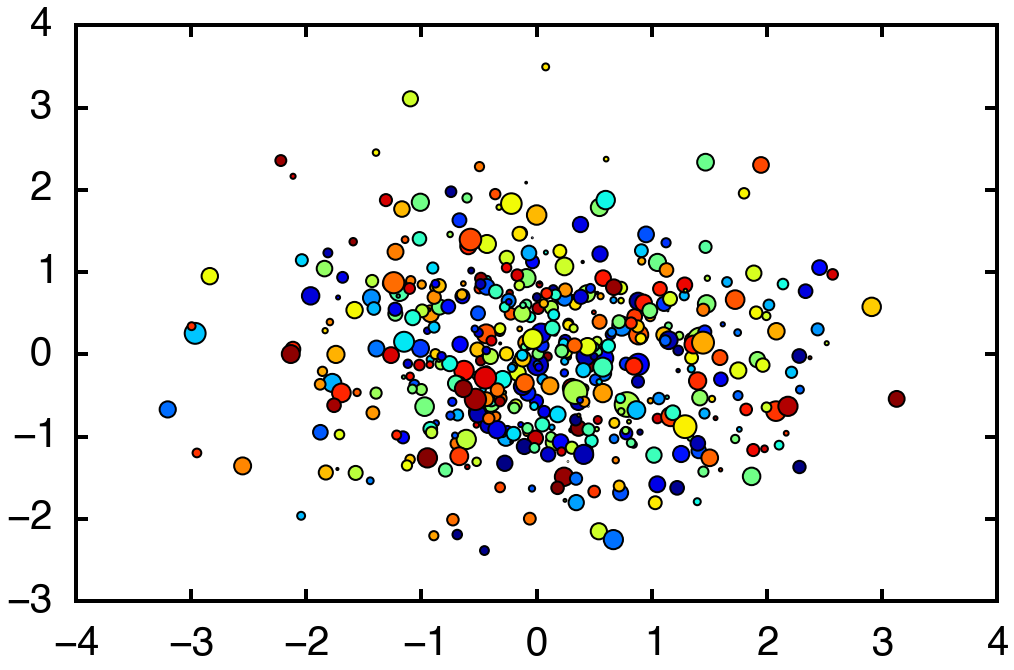

In [28]:
# scatter graph
plt.figure(5);
x = np.random.randn(1000) 
y = np.random.randn(1000) 
size = 50*np.random.randn(1000) 
col = np.random.rand(1000) 
plt.scatter(x, y, s=size, c=col)

### Polar plots

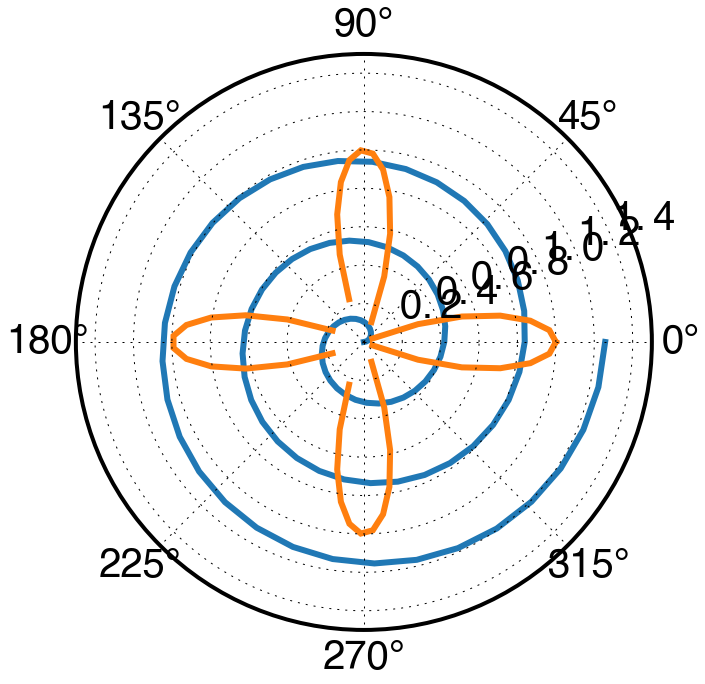

In [35]:
# polar plot 
plt.figure(6);
theta = np.linspace(0, 2.0*np.pi, 100) 
plt.polar(3*theta, theta/5); 
plt.polar(theta, np.cos(4*theta)); 

### Annotating plots

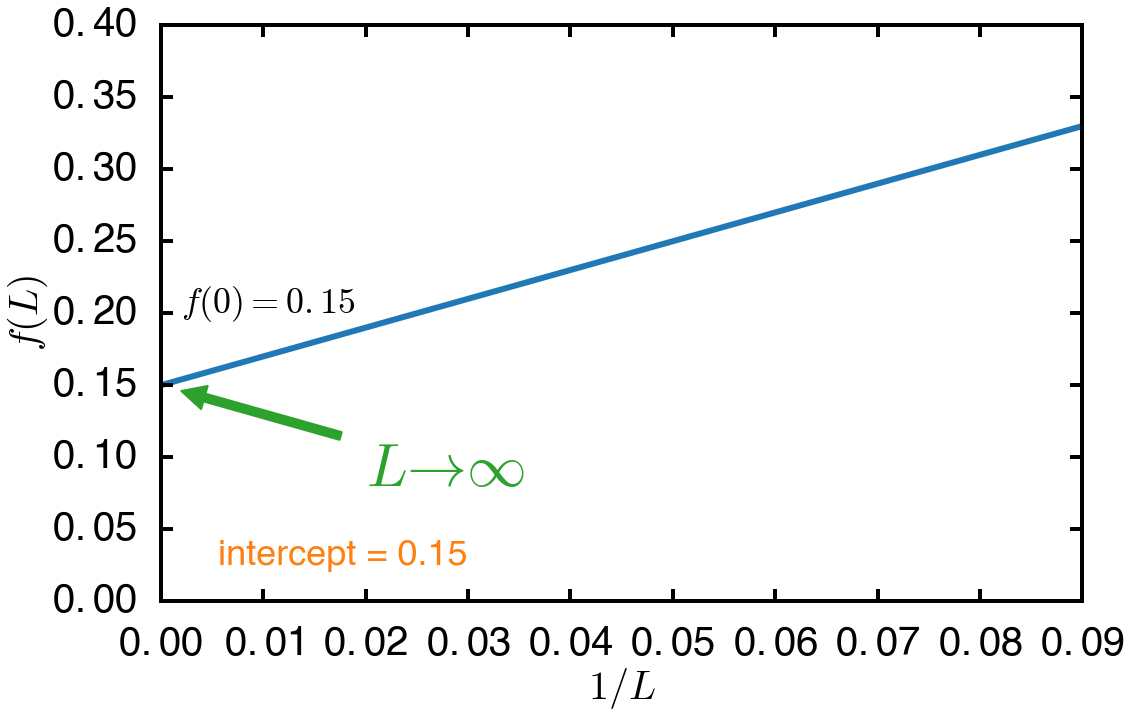

In [29]:
# Produce a linear plot with an intercept
    
iL = np.linspace(0, 0.1, 100)
yint = 0.15
y = yint + 2.0*iL
plt.plot(iL,y,marker='None', linestyle='-')
plt.axis([0,0.09,0,0.4])
plt.xlabel(r'$1/L$')
plt.ylabel(r'$f(L)$')

# Our first label in data coordinates
plt.text(0.002,0.20,r'$f(0) = 0.15$', fontsize=18)
    
# The label in figure coordinates
plt.figtext(0.2,0.2,'intercept = 0.15', fontsize=18, color=colors[1])
    
# Add a label and an arrow
plt.annotate(r'$L \to \infty$',xy=(0, 0.15), xytext=(0.02, 0.08),\
             fontsize=30, color=colors[2],\
             arrowprops=dict(color=colors[2],shrink=0.1))

<div class="span alert alert-success">
<h2> Team Programming challenge </h2>
<h3> Determine a graphical solution for x(a) (with at least 6 points) to the transcendental equation: </h3>
</div>
\begin{equation}
x = \tanh\left(\frac{x}{a} \right)
\end{equation}

<IPython.core.display.Javascript object>


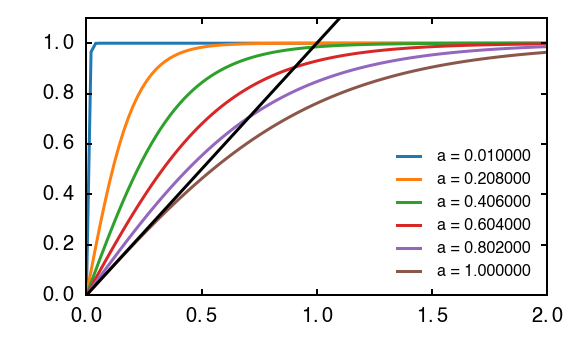

(0, 1.1)

In [9]:
def RHS(x,a):
    return np.tanh(x/a)

x = np.linspace(0,2,100)

%matplotlib notebook
plt.figure()
for ca in np.linspace(0.01,1,6):
    plt.plot(x,RHS(x,ca),label='a = %f'%ca)
plt.legend(loc='lower right')

plt.plot(x,x,'k-')
plt.ylim(0,1.1)

<IPython.core.display.Javascript object>


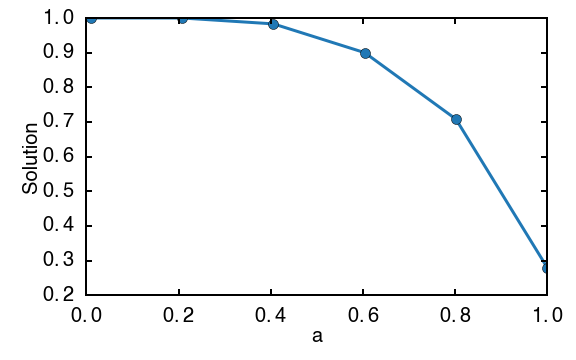

In [8]:
asol = np.linspace(0.01,1,6)
xsol = [1.0,1.0,0.983,0.90,0.708,0.2798]
plt.figure()
plt.plot(asol,xsol,'o-')
plt.xlabel('a')
plt.ylabel('Solution')

In [ ]:
# %load data/transcendental.py
# transcendental.py
# Adrian Del Maestro 
# 09.13.2012 

# A graphical solution of a transcendental equation

import matplotlib.pyplot as plt
import numpy as np
plt.style.use('notebook');

x_sol = []

# ----------------------------------------------------------------------------
def trans(x,a):
    ''' A transcendental equation. '''
    return np.tanh(x/a)

def onclick(event):
    x_sol.append(event.xdata)

# ----------------------------------------------------------------------------
# main program
# ----------------------------------------------------------------------------
def main():

    a = np.linspace(0.1,1.0,6)
    x = np.arange(0.0,1.21,0.01)

    # Show the graphical solution
    fig = plt.figure(1)
    plt.plot(x,x,'k-', label='_nolegend_')
    for i,ca in enumerate(a):
        label = 'a = %5.3f' % ca
        plt.plot(x,trans(x,ca),'-', label=label)

    plt.legend(prop={'size':14}, ncol=3, loc='lower right')
    plt.axis([-0.2,1.2,-0.2,1.2])

    # Determine the graphical solution
    cid = fig.canvas.mpl_connect('button_press_event', onclick)
    plt.show()

    # visually identifying the solution
    sol = np.array(x_sol)

    # plot the identified solution
    plt.figure(2)
    plt.plot(a,sol,'o-', linewidth=1, markersize=5, markeredgecolor='gray')
    plt.xlabel(r'$a$')
    plt.ylabel(r'$x$')
    plt.ylim(0,1.1)

    plt.show()
        
if __name__ == '__main__':
    main()
